In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
import os
import numpy as np
import pandas as pd
#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_8/models/')
filename = "modelrf_fold8_15AB_15AB_1.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)

In [3]:
dataframe = pd.read_csv('/home/yupaporn/codes/USAI/FeaturesVector_Testset_15AB_fold8_1.csv')
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,-0.128033,0.372055,0.231621,-0.073239,0.402986,-0.195886,0.042558,-0.125679,-0.138258,-0.227635,...,-0.004567,-0.057874,0.053324,0.138560,0.218332,0.268161,Abnormal,P1,FP-A,AB01
1,-0.168304,1.187761,-0.035822,0.188553,0.129346,-0.189786,0.009554,0.084759,-0.178211,-0.223040,...,-0.074544,-0.056200,0.107183,0.870391,0.097194,-0.036060,Abnormal,P2,FP-A,AB01
2,-0.042087,0.501292,0.502790,0.161901,0.393783,-0.181092,0.468927,-0.175236,-0.178993,-0.217920,...,-0.192785,-0.043217,0.007996,0.186727,0.505801,0.006274,Abnormal,P41,FP-B,AB01
3,-0.095906,0.310310,-0.053850,0.067492,0.344821,-0.207735,0.502031,-0.182979,-0.176417,-0.104944,...,-0.037776,-0.093991,-0.112985,0.742082,0.290050,0.101018,Abnormal,P51,FP-C,AB01
4,-0.055512,0.315975,0.399997,-0.031665,0.287015,-0.210752,0.086834,-0.189072,-0.162107,-0.219464,...,-0.094868,0.310392,-0.054814,-0.037307,0.450051,0.104904,Abnormal,P31,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-0.014464,0.352231,-0.031963,0.151320,0.544782,-0.172072,0.052391,0.236083,1.093669,-0.056745,...,0.154758,0.177943,0.519467,0.220511,0.644705,0.572409,Normal,P32,FP-B,Normal
1308,-0.095325,-0.115655,-0.182079,-0.155014,-0.215893,0.101059,-0.135583,0.325744,0.169907,0.177853,...,-0.042670,0.024621,0.297623,-0.055193,-0.125430,-0.046318,Normal,P42,FP-B,Normal
1309,-0.021228,0.199683,-0.142337,0.048237,0.439096,-0.192373,-0.053260,0.051101,-0.011431,-0.132580,...,0.134955,0.046842,0.389997,0.859424,0.460526,0.071837,Normal,P52,FP-C,Normal
1310,0.063192,-0.089012,-0.054132,-0.114209,0.064183,-0.164629,-0.045040,-0.166375,0.207043,-0.150898,...,0.176487,0.041104,-0.145424,0.089615,-0.164741,0.354660,Normal,P61,FP-C,Normal


In [4]:
X_test = dataframe.iloc[:,0:2048]
y_test = dataframe.iloc[:,2051]
print(X_test.shape)
print(y_test.shape)

(1312, 2048)
(1312,)


In [5]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,-0.128033,0.372055,0.231621,-0.073239,0.402986,-0.195886,0.042558,-0.125679,-0.138258,-0.227635,...,-0.199392,-0.229188,0.244996,0.050404,-0.004567,-0.057874,0.053324,0.138560,0.218332,0.268161
1,-0.168304,1.187761,-0.035822,0.188553,0.129346,-0.189786,0.009554,0.084759,-0.178211,-0.223040,...,-0.164924,-0.207116,-0.114500,-0.116244,-0.074544,-0.056200,0.107183,0.870391,0.097194,-0.036060
2,-0.042087,0.501292,0.502790,0.161901,0.393783,-0.181092,0.468927,-0.175236,-0.178993,-0.217920,...,-0.136192,-0.198758,0.127608,-0.064392,-0.192785,-0.043217,0.007996,0.186727,0.505801,0.006274
3,-0.095906,0.310310,-0.053850,0.067492,0.344821,-0.207735,0.502031,-0.182979,-0.176417,-0.104944,...,-0.167677,-0.197798,0.370759,0.079556,-0.037776,-0.093991,-0.112985,0.742082,0.290050,0.101018
4,-0.055512,0.315975,0.399997,-0.031665,0.287015,-0.210752,0.086834,-0.189072,-0.162107,-0.219464,...,-0.123287,-0.223759,0.275550,0.057633,-0.094868,0.310392,-0.054814,-0.037307,0.450051,0.104904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-0.014464,0.352231,-0.031963,0.151320,0.544782,-0.172072,0.052391,0.236083,1.093669,-0.056745,...,0.533594,-0.070425,0.075607,0.153206,0.154758,0.177943,0.519467,0.220511,0.644705,0.572409
1308,-0.095325,-0.115655,-0.182079,-0.155014,-0.215893,0.101059,-0.135583,0.325744,0.169907,0.177853,...,0.299779,-0.067395,0.271662,-0.073572,-0.042670,0.024621,0.297623,-0.055193,-0.125430,-0.046318
1309,-0.021228,0.199683,-0.142337,0.048237,0.439096,-0.192373,-0.053260,0.051101,-0.011431,-0.132580,...,-0.084405,-0.186215,0.084579,0.565128,0.134955,0.046842,0.389997,0.859424,0.460526,0.071837
1310,0.063192,-0.089012,-0.054132,-0.114209,0.064183,-0.164629,-0.045040,-0.166375,0.207043,-0.150898,...,-0.007184,-0.123348,-0.215256,-0.052409,0.176487,0.041104,-0.145424,0.089615,-0.164741,0.354660


In [6]:
y_test

0         AB01
1         AB01
2         AB01
3         AB01
4         AB01
         ...  
1307    Normal
1308    Normal
1309    Normal
1310    Normal
1311    Normal
Name: Sub_class, Length: 1312, dtype: object

In [7]:
y_pred = model.predict(X_test)

In [8]:
dataframe['Sub_class_pred'] = y_pred
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class,Sub_class_pred
0,-0.128033,0.372055,0.231621,-0.073239,0.402986,-0.195886,0.042558,-0.125679,-0.138258,-0.227635,...,-0.057874,0.053324,0.138560,0.218332,0.268161,Abnormal,P1,FP-A,AB01,Normal
1,-0.168304,1.187761,-0.035822,0.188553,0.129346,-0.189786,0.009554,0.084759,-0.178211,-0.223040,...,-0.056200,0.107183,0.870391,0.097194,-0.036060,Abnormal,P2,FP-A,AB01,AB01
2,-0.042087,0.501292,0.502790,0.161901,0.393783,-0.181092,0.468927,-0.175236,-0.178993,-0.217920,...,-0.043217,0.007996,0.186727,0.505801,0.006274,Abnormal,P41,FP-B,AB01,AB01
3,-0.095906,0.310310,-0.053850,0.067492,0.344821,-0.207735,0.502031,-0.182979,-0.176417,-0.104944,...,-0.093991,-0.112985,0.742082,0.290050,0.101018,Abnormal,P51,FP-C,AB01,AB01
4,-0.055512,0.315975,0.399997,-0.031665,0.287015,-0.210752,0.086834,-0.189072,-0.162107,-0.219464,...,0.310392,-0.054814,-0.037307,0.450051,0.104904,Abnormal,P31,FP-B,AB01,AB02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,-0.014464,0.352231,-0.031963,0.151320,0.544782,-0.172072,0.052391,0.236083,1.093669,-0.056745,...,0.177943,0.519467,0.220511,0.644705,0.572409,Normal,P32,FP-B,Normal,Normal
1308,-0.095325,-0.115655,-0.182079,-0.155014,-0.215893,0.101059,-0.135583,0.325744,0.169907,0.177853,...,0.024621,0.297623,-0.055193,-0.125430,-0.046318,Normal,P42,FP-B,Normal,Normal
1309,-0.021228,0.199683,-0.142337,0.048237,0.439096,-0.192373,-0.053260,0.051101,-0.011431,-0.132580,...,0.046842,0.389997,0.859424,0.460526,0.071837,Normal,P52,FP-C,Normal,Normal
1310,0.063192,-0.089012,-0.054132,-0.114209,0.064183,-0.164629,-0.045040,-0.166375,0.207043,-0.150898,...,0.041104,-0.145424,0.089615,-0.164741,0.354660,Normal,P61,FP-C,Normal,Normal


In [9]:
act = dataframe['Sub_class'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
pred = dataframe['Sub_class_pred'].map({'AB12':1, 'AB04':1, 'AB05':1, 'Normal':0, 'AB02':1, 'AB11':1, 'AB082':1, 'AB06':1,'AB07':1, 'AB081':1, 'AB09':1, 'AB03':1, 'AB10':1, 'AB01':1, 'AB083':1}).values
cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 92.22560975609755%
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       857
           1       0.99      0.79      0.88       455

    accuracy                           0.92      1312
   macro avg       0.94      0.89      0.91      1312
weighted avg       0.93      0.92      0.92      1312



852 5 97 358


Text(0.5, 21.5, 'Predicted label')

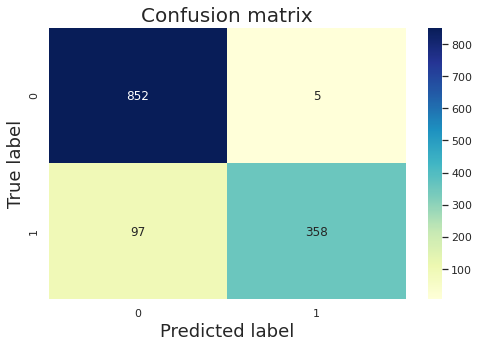

In [10]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print(TN, FP, FN, TP)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [11]:
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print('TN = ', TN)
print('FP = ', FP)
print('FN = ', FN)
print('TP = ', TP)

TN =  852
FP =  5
FN =  97
TP =  358


In [12]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[ 43  10   0   0   0   0   0   1   0   0   0   0   0   0  20]
 [  4  38  10   0   0   0   0   0   0   0   1   0   0   0   7]
 [  0  10   8   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  26   0   1   0   2   0   0   0   0   0   2  12]
 [  0   0   0   0  20   0   0   0   0   0   0   0   0   0   9]
 [  0   0   0   0   0  13   1   0   0   0   0   0   0   0   7]
 [  0   0   0   0   0   1  11   0   0   0   0   0   0   0   9]
 [  2   0   0   0   0   0   0  21   0   0   0   0   0   1   8]
 [  0   0   0   0   1   1   0   2  16   1   1   1   0   1   4]
 [  0   0   0   1   0   0   0   0   3   5   0   0   0   0   2]
 [  0   0   0   0   0   0   1   0   0   0  20   0   0   0   5]
 [  0   0   0   0   0   0   0   0   0   0   0   6   0   0   4]
 [  0   0   0   0   0   0   0   0   0   0   1   0  18   1   3]
 [  0   0   0   2   0   0   0   1   0   0   0   0   0  49   7]
 [  0   1   0   1   2   0   1   0   0   0   0   0   0   0 852]]
              precision    recall  f1-score   support


Text(0.5, 21.5, 'Predicted label')

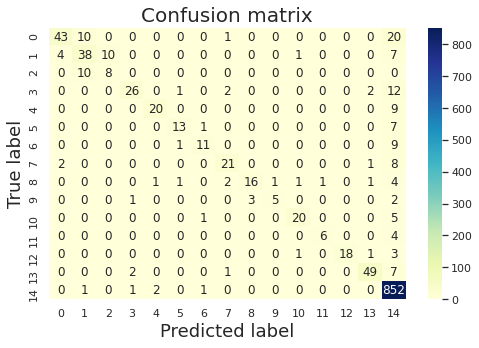

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)